In [2]:
import numpy as np
import pandas as pd

index = [('台北', 2019), ('台北', 2020),
         ('台中', 2019), ('台中', 2020),
         ('台南', 2019), ('台南', 2020)]

populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

multiIndex = pd.MultiIndex.from_tuples(index, names=['縣市','年度'])

pop=pd.Series(populations, index=multiIndex)
pop

縣市  年度  
台北  2019    33871648
    2020    37253956
台中  2019    18976457
    2020    19378102
台南  2019    20851820
    2020    25145561
dtype: int64

In [4]:
pop_df=pop.unstack()
pop_df

年度,2019,2020
縣市,,
台中,18976457,19378102
台北,33871648,37253956
台南,20851820,25145561


/var/folders/sc/qdlfmrjj53d2nb74qg378bq00000gn/T/ipykernel_1510/1083608964.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0','5佰萬','1仟萬','1仟5佰萬','2仟萬','2仟5佰萬','3仟萬','3仟5佰萬'],fontproperties=font)


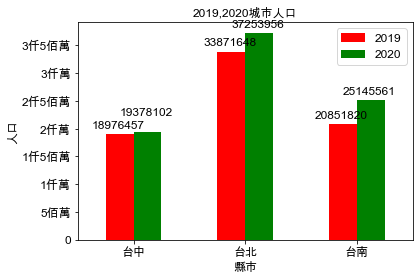

In [44]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

#建立中文字型的font實體
font = FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=12) #mac使用者
# font = FontProperties(fname=r'c:\windows\fonts\simsun.ttc',size=8) #window使用者

figure, ax1 = plt.subplots(1,1)
pop_df.plot(kind='bar',ax=ax1,color=['r','g'])
ax1.set_xticklabels(pop_df.index,fontproperties=font,rotation='horizontal')
ax1.set_xlabel('縣市',fontproperties=font)
ax1.set_ylabel('人口',fontproperties=font)
ax1.legend(['2019','2020'],prop=font)
ax1.set_yticklabels(['0','5佰萬','1仟萬','1仟5佰萬','2仟萬','2仟5佰萬','3仟萬','3仟5佰萬'],fontproperties=font)
ax1.set_title('2019,2020城市人口', fontproperties=font)
i=0
addHeight = 0
for p in ax1.patches:
    i += 1
    if i == 4:
        addHeight = 2000000
    else:
        addHeight = 0
    
    width,height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax1.annotate(f'{height}', (x +width/2-width, y+height+1000000+addHeight),fontproperties=font)